In [1]:
import pandas as pd
import numpy as np
import zipfile
import pylab as plt    
import seaborn as sns
import sys

ruta_archivo = r'C:\Users\lpgal\Desktop\Ironhack\Proyectos\Shark_Attack_Project\src'
sys.path.append(ruta_archivo)
from functions import *

pd.set_option('display.max_columns', None)  # me muestre todas las columnas

In [2]:
shark=pd.read_csv('../data/sharkattack_parte1.csv')

In [3]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0


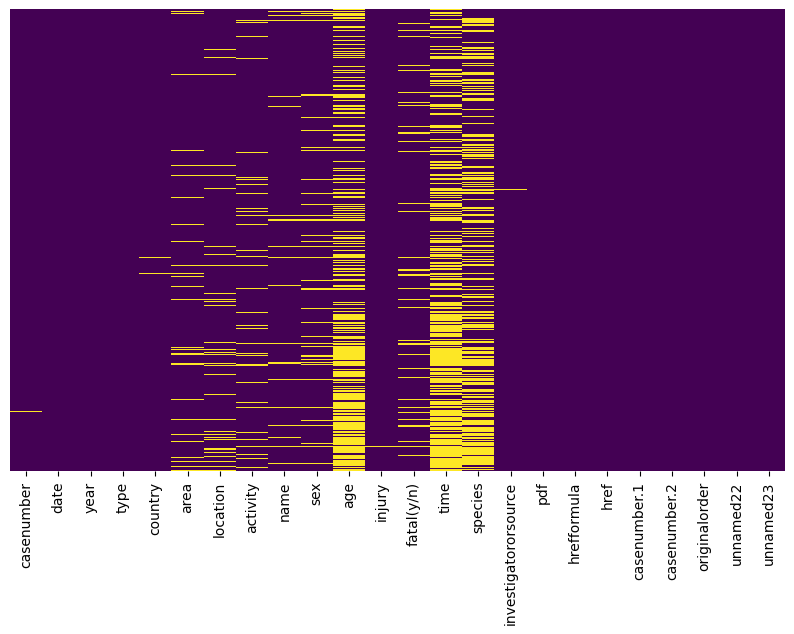

In [4]:
grafico(shark)

In [5]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6301 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6300 non-null   float64
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource 

En este punto voy a empezar a limpiar nulos columna por columna

Voy a emopezar por la columna age

In [6]:
shark.age.value_counts()

17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: age, Length: 157, dtype: int64

In [7]:
shark['age'] = shark['age'].str.replace(' ', '')

In [8]:
shark.age.value_counts()

17        154
18        150
20        142
19        142
15        139
         ... 
18to22      1
adult       1
9&12        1
?&19        1
13or14      1
Name: age, Length: 150, dtype: int64

In [9]:
shark['age'].isna().mean() * 100 # % de datos que son nulos

44.92224690574421

In [10]:
shark['age'].tolist()

['57',
 '11',
 '48',
 nan,
 nan,
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '10',
 '21',
 '34',
 nan,
 nan,
 nan,
 '30',
 nan,
 nan,
 '60',
 nan,
 '32',
 '33',
 '29',
 '54',
 '34',
 '41',
 '37',
 nan,
 '56',
 nan,
 '12',
 '19',
 '25',
 '10',
 '69',
 '18',
 '38',
 '55',
 '34',
 '35',
 nan,
 '46',
 '45',
 '14',
 '18',
 '40s',
 nan,
 '28',
 '20',
 nan,
 '54',
 '35',
 '24',
 '25',
 '26',
 '49',
 nan,
 '25',
 '14',
 '24',
 '25',
 '22',
 '7',
 '31',
 nan,
 nan,
 '17',
 '60',
 '15',
 nan,
 nan,
 '54',
 '40',
 '31',
 nan,
 nan,
 '33',
 nan,
 nan,
 '13',
 '28',
 '25',
 nan,
 nan,
 '18',
 nan,
 '35',
 nan,
 nan,
 '42',
 nan,
 nan,
 '17',
 '37',
 '3',
 '11',
 nan,
 '69',
 nan,
 '13',
 '20',
 '34',
 nan,
 '15',
 '10',
 '12',
 nan,
 nan,
 '37',
 nan,
 nan,
 '40',
 '8',
 '40',
 '50',
 nan,
 nan,
 nan,
 '46',
 '32',
 '13',
 nan,
 nan,
 '16',
 nan,
 '14',
 '34',
 '82',
 nan,
 nan,
 '48',
 nan,
 '19',
 '30',
 nan,
 '32',
 '20',
 nan,
 '73',
 '41',
 '29',
 '33',
 '18',
 nan,
 '14',
 '33',
 '28',
 

In [11]:
shark['age'].isna().sum()

2831

En este caso como no hay ningún valor que me pueda ayudar a obtener la edad en otras columnas voy a analizar los valores que no son nulos

Para ello primero voy a agregarme una coolumna que tenga los valores numericos y al resto le asigno un valor None

In [12]:
shark['numero'] = 0


for fila, valor in enumerate(shark['age']):
    try:
        num = int(valor)
        shark.at[fila, 'numero'] = num
    except ValueError:
        shark.at[fila, 'numero'] = 0

In [13]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23,numero
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0,57
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0,11
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0,48
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0,0


In [14]:
shark.numero.median()

12.0

In [15]:
shark.numero.mean()

14.630910821961281

In [16]:
shark.numero.max()

87

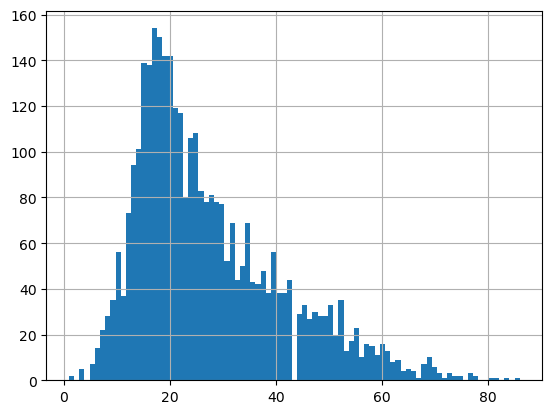

In [17]:
shark[(shark['numero']<87) & (shark['numero']>0)]['numero'].hist(bins=87);

In [18]:
shark['age'] = shark['numero']

In [19]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23,numero
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0,57
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0,11
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0,48
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0,0


In [20]:
shark.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6302 entries, 0 to 6301
Series name: age
Non-Null Count  Dtype
--------------  -----
6302 non-null   int64
dtypes: int64(1)
memory usage: 49.4 KB


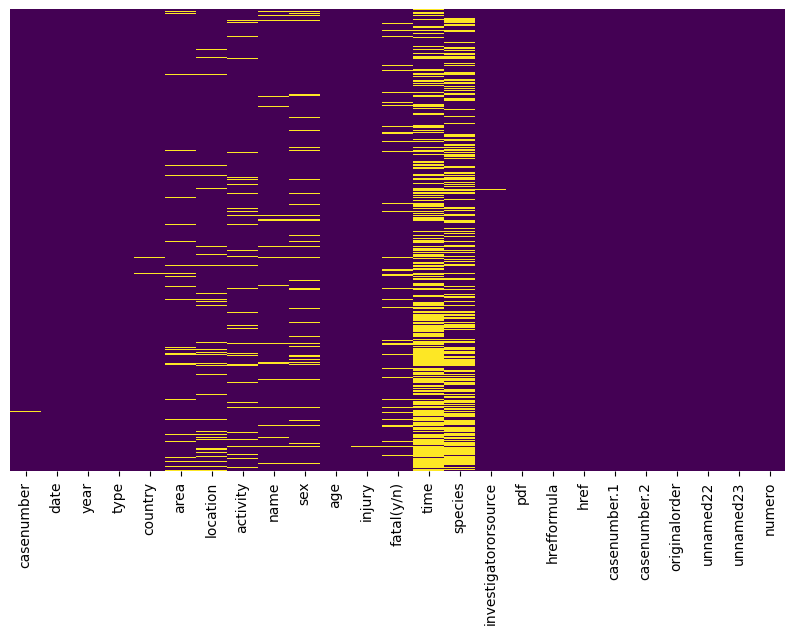

In [21]:
grafico(shark)

El siguiente paso es analizar la columna time

In [22]:
shark.time.value_counts()

Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: time, Length: 366, dtype: int64

In [23]:
shark['time'] = shark['time'].replace('h', ':', regex=True)

In [24]:
shark.time.value_counts()

Afternoon      187
11:00          128
Morning        121
12:00          109
15:00          108
              ... 
14:37            1
10:07            1
13:53            1
13:23            1
19:00-20:00      1
Name: time, Length: 366, dtype: int64

In [25]:
shark['time_fhora'] = shark['time'].str.extract(r'(\d{2}:\d{2})', expand=False)

In [26]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23,numero,time_fhora
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18:00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0,57,18:00
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14:00 -15:00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0,11,14:00
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07:45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0,48,07:45
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0,0,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0,0,NaN


In [27]:
shark.time_fhora.isna().sum()

3936

In [28]:
null = shark['time_fhora'].isna()

# Filtrar filas en 'col1' que no sean NaN pero 'col2' sí sea NaN
filtro = shark.loc[null, 'time']

filtro.value_counts()

Afternoon                 187
Morning                   121
Nig:t                      62
Late afternoon             35
Evening                    34
                         ... 
2 :ours after Opperman      1
Mid afternoon               1
Mid morning                 1
"Nig:t"                     1
dusk                        1
Name: time, Length: 68, dtype: int64

Para solucionar este problema creo un diccionario con unas palabras y unas horas y luego si encuentra en la key del diccionario la palabra que ponga el valor del value del diccionario

In [29]:
shark.time = [e.lower() for e in shark.time]

AttributeError: 'float' object has no attribute 'lower'

In [30]:
times = {
    'Afternoon': '18:00',
    'afternoon': '18:00',
    'Morning': '09:00',
    'morning': '09:00',
    'Night': '00:00',
    'night': '00:00',
    'Evening': '21:00',
    'evening': '21:00',
}

In [31]:
shark['time'] = shark['time'].replace(times, inplace=True)

In [33]:
null = shark['time_fhora'].isna()

# Filtrar filas en 'col1' que no sean NaN pero 'col2' sí sea NaN
filtro = shark.loc[null, 'time']

filtro.value_counts()

Series([], Name: time, dtype: int64)

In [35]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23,numero,time_fhora
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,None,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0,57,18:00
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,None,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0,11,14:00
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,None,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0,48,07:45
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0,0,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0,0,NaN
